In [1]:
import matplotlib as plt

In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mathplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)
ERROR: No matching distribution found for mathplotlib


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split

# Load images and labels
def load_images_and_labels(data_dir):
    images = []
    labels = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                img = Image.open(img_path)
                img = img.resize((64, 64))  # Resize image if needed
                img_array = np.array(img) / 255.0  # Normalize image
                images.append(img_array)
                labels.append(category)
    return np.array(images), np.array(labels)

data_dir = r"C:\Users\thath\OneDrive - University of Bradford\Discipline-specific Artificial Intelligence Project\EX\EuroSAT_RGB"
images, labels = load_images_and_labels(data_dir)

# Encode labels
label_to_index = {label: index for index, label in enumerate(np.unique(labels))}
encoded_labels = np.array([label_to_index[label] for label in labels])

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(images, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define U-Net model
def unet_model(input_size=(64, 64, 3)):
    inputs = layers.Input(input_size)
    
    # Downsampling
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    
    # Bottleneck
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    
    # Upsampling
    up6 = layers.Conv2D(512, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv5))
    merge6 = layers.concatenate([conv4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)
    
    up7 = layers.Conv2D(256, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)
    
    up8 = layers.Conv2D(128, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)
    
    up9 = layers.Conv2D(64, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)
    
    conv10 = layers.GlobalAveragePooling2D()(conv9)
    output = layers.Dense(10, activation='softmax')(conv10)  # Assuming 10 classes

    model = models.Model(inputs, output)
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = unet_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 64, 64,    │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 32, 32,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 16,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 256) │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 8, 8, 512) │  1,180,160 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 8, 8, 512) │  2,359,808 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 4, 4, 512) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 4, 4,      │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 4, 4,      │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 8, 8,      │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 8, 8, 512) │  2,097,664 │ up_sampling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8, 8,      │          0 │ conv2d_7[0][0], 

 Total params: 31,032,330 (118.38 MB)

 Trainable params: 31,032,330 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1466s 3s/step - accuracy: 0.2537 - loss: 1.8436 - val_accuracy: 0.3886 - val_loss: 1.5991
Epoch 2/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1359s 3s/step - accuracy: 0.4183 - loss: 1.5488 - val_accuracy: 0.6005 - val_loss: 1.0508
Epoch 3/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1343s 3s/step - accuracy: 0.6067 - loss: 1.1105 - val_accuracy: 0.6607 - val_loss: 0.9466
Epoch 4/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1351s 3s/step - accuracy: 0.7066 - loss: 0.8196 - val_accuracy: 0.7118 - val_loss: 0.8395
Epoch 5/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1344s 3s/step - accuracy: 0.7540 - loss: 0.6834 - val_accuracy: 0.7399 - val_loss: 0.7091
Epoch 6/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1336s 2s/step - accuracy: 0.7764 - loss: 0.6222 - val_accuracy: 0.8242 - val_loss: 0.4993
Epoch 7/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1337s 2s/step - accuracy: 0.8181 - loss: 0.5122 - val_accuracy: 0.8337 - val_loss: 0.4530
Epoch 8/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1338s 2s/step - accuracy: 0.8474 - loss: 0.4290 - 

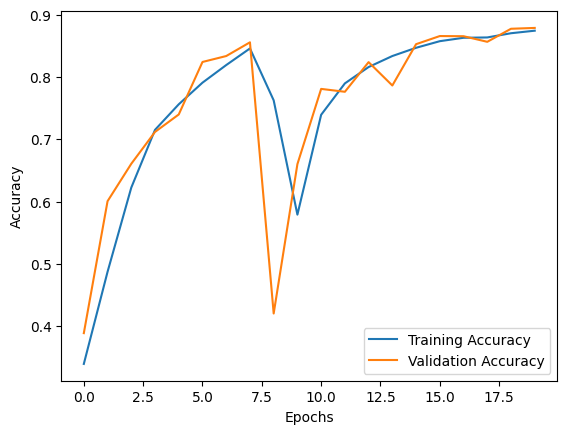

In [2]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Save the model
model_save_path = model_save_path = "C:\\Users\\thath\\OneDrive - University of Bradford\\Discipline-specific Artificial Intelligence Project\\EX\\model.keras"
model.save(model_save_path)
print(f"Model saved at {model_save_path}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [3]:
import pickle

history_save_path = r"C:\\Users\\thath\\OneDrive - University of Bradford\\Discipline-specific Artificial Intelligence Project\\EX\\training_history.pkl"
with open(history_save_path, 'wb') as f:
    pickle.dump(history.history, f)

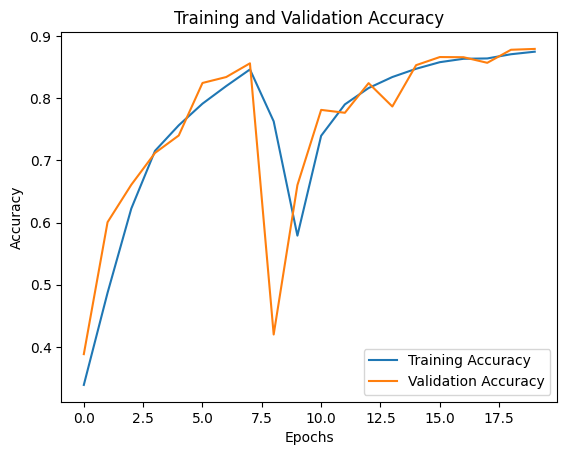

In [4]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
